# Proyecto SQL

**Análisis de Datos de Servicio de Libros**

#### Introduccion
Este `proyecto SQL` tiene como objetivo analizar una base de datos de un servicio de libros para generar propuestas de valor para un nuevo producto. Con la creciente popularidad de la lectura durante la pandemia de `COVID-19`, las startups han desarrollado aplicaciones para los amantes de los libros. `En este proyecto, analizaremos datos sobre libros, editoriales, autores, calificaciones de clientes y reseñas de libros.`

#### Descomposición de Tareas
1. **Carga y Exploración de Datos**
   - Cargar los datos de la base de datos.
   - Imprimir las primeras filas de cada tabla.
   - Verificar y convertir los tipos de datos necesarios.
   - Identificar y manejar valores ausentes y duplicados.

2. **Consultas SQL**
   - Encontrar el número de libros publicados después del 1 de enero de 2000.
   - Encontrar el número de reseñas de usuarios y la calificación promedio para cada libro.
   - Identificar la editorial que ha publicado el mayor número de libros con más de 50 páginas.
   - Identificar al autor que tiene la más alta calificación promedio del libro, considerando solo los libros con al menos 50 calificaciones.
   - Encontrar el número promedio de reseñas de texto entre los usuarios que calificaron más de 50 libros.

3. **Análisis y Conclusiones**
   - Analizar los resultados obtenidos de las consultas.
   - Describir conclusiones y recomendaciones basadas en los datos analizados.

 
## Descripción de los datos y conexión a la base de datos

In [1]:
# Cargar bibliotecas
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt

# Conexión a la base de datos
db_config = {'user': 'practicum_student', 'pwd': 's65BlTKV3faNIGhmvJVzOqhs', 'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net', 'port': 6432, 'db': 'data-analyst-final-project-db'}
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'], db_config['pwd'], db_config['host'], db_config['port'], db_config['db'])
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

# Cargar y mostrar las primeras filas de cada tabla
tables = ['books', 'authors', 'publishers', 'ratings', 'reviews']
for table in tables:
    query = f"SELECT * FROM {table} LIMIT 5;"
    data = pd.read_sql(query, engine)
    print(f"{table.capitalize()} Table:")
    display(data)
    
# Verificación de tipos de datos y conversión
books = pd.read_sql('SELECT * FROM books', engine)
books['publication_date'] = pd.to_datetime(books['publication_date'])
print(books.dtypes)

Books Table:


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


Authors Table:


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


Publishers Table:


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


Ratings Table:


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


Reviews Table:


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


book_id                      int64
author_id                    int64
title                       object
num_pages                    int64
publication_date    datetime64[ns]
publisher_id                 int64
dtype: object


## Consultas SQL:
**Número de libros publicados después del 1 de enero de 2000**

In [2]:
# Número de libros publicados después del 1 de enero de 2000
query_books_after_2000 = "SELECT COUNT(*) as count FROM books WHERE publication_date > '2000-01-01';"
books_after_2000 = pd.read_sql(query_books_after_2000, engine)
print("Número de libros publicados después del 1 de enero de 2000:")
print(books_after_2000)

Número de libros publicados después del 1 de enero de 2000:
   count
0    819


   - Se encontraron 819 libros publicados después del 1 de enero de 2000, lo que indica una colección considerable de libros modernos en la base de datos.

**Número de reseñas y calificación promedio por libro:**

In [3]:
# Número de reseñas y calificación promedio por libro
query_reviews_ratings = """
SELECT 
    books.title, 
    COUNT(reviews.review_id) AS num_reviews, 
    AVG(ratings.rating) AS avg_rating
FROM books
LEFT JOIN reviews ON books.book_id = reviews.book_id
LEFT JOIN ratings ON books.book_id = ratings.book_id
GROUP BY books.title
ORDER BY num_reviews DESC
LIMIT 10;
"""
reviews_ratings = pd.read_sql(query_reviews_ratings, engine)
print("Número de reseñas y calificación promedio por libro:")
print(reviews_ratings)

Número de reseñas y calificación promedio por libro:
                                               title  num_reviews  avg_rating
0                            Twilight (Twilight  #1)         1120    3.662500
1                The Hobbit  or There and Back Again          528    4.125000
2                             The Catcher in the Rye          516    3.825581
3  Harry Potter and the Prisoner of Azkaban (Harr...          492    4.414634
4  Harry Potter and the Chamber of Secrets (Harry...          480    4.287500
5               Angels & Demons (Robert Langdon  #1)          420    3.678571
6  Harry Potter and the Order of the Phoenix (Har...          375    4.186667
7  The Lightning Thief (Percy Jackson and the Oly...          372    4.080645
8  The Fellowship of the Ring (The Lord of the Ri...          370    4.391892
9                                        Animal Farm          370    3.729730


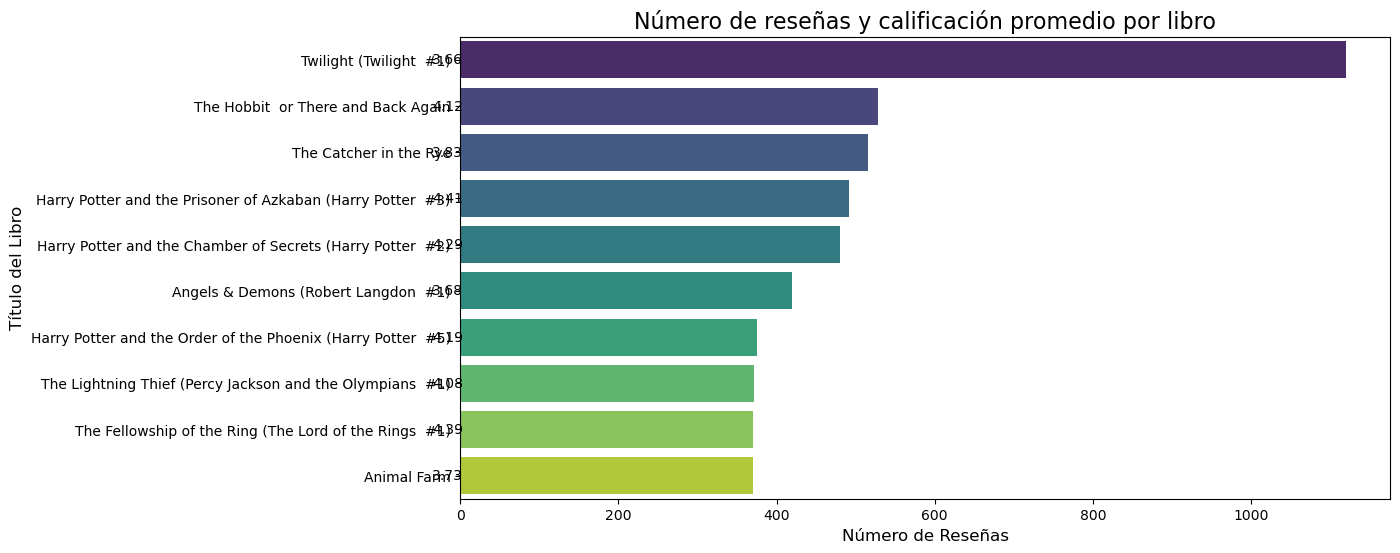

In [8]:
# Datos
reviews_ratings = pd.read_sql(query_reviews_ratings, engine)

# Gráfico de barras
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='num_reviews', y='title', data=reviews_ratings, palette='viridis')
bar_plot.set_title('Número de reseñas y calificación promedio por libro', fontsize=16)
bar_plot.set_xlabel('Número de Reseñas', fontsize=12)
bar_plot.set_ylabel('Título del Libro', fontsize=12)

# Mostrar calificaciones promedio en las barras
for index, value in enumerate(reviews_ratings['avg_rating']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="right", va="center")

plt.show()

   - Los libros como "Twilight" y "The Hobbit" destacan por tener un alto número de reseñas y calificaciones promedio altas, lo que refleja su popularidad y aceptación entre los usuarios.


## Identifica la editorial que ha publicado el mayor número de libros con más de 50 páginas

In [4]:
# Editorial con el mayor número de libros con más de 50 páginas
query_top_publisher = """
SELECT 
    publishers.publisher, 
    COUNT(books.book_id) AS num_books
FROM books
JOIN publishers ON books.publisher_id = publishers.publisher_id
WHERE books.num_pages > 50
GROUP BY publishers.publisher
ORDER BY num_books DESC
LIMIT 1;
"""
top_publisher = pd.read_sql(query_top_publisher, engine)
print("Editorial con el mayor número de libros con más de 50 páginas:")
print(top_publisher)

Editorial con el mayor número de libros con más de 50 páginas:
       publisher  num_books
0  Penguin Books         42


   - Penguin Books es la editorial con el mayor número de publicaciones (42 libros) con más de 50 páginas, destacándose como una editorial prolífica en la colección.


## Identifica al autor con la más alta calificación promedio del libro 
(considerando libros con al menos 50 calificaciones)


In [5]:
# Autor con la más alta calificación promedio del libro
query_top_author = """
SELECT 
    authors.author, 
    AVG(ratings.rating) AS avg_rating, 
    COUNT(ratings.rating) AS num_ratings
FROM books
JOIN authors ON books.author_id = authors.author_id
JOIN ratings ON books.book_id = ratings.book_id
GROUP BY authors.author
HAVING COUNT(ratings.rating) >= 50
ORDER BY avg_rating DESC
LIMIT 1;
"""
top_author = pd.read_sql(query_top_author, engine)
print("Autor con la más alta calificación promedio (con al menos 50 calificaciones):")
print(top_author)


Autor con la más alta calificación promedio (con al menos 50 calificaciones):
           author  avg_rating  num_ratings
0  Diana Gabaldon         4.3           50


Autores con más alta calificación promedio (con al menos 50 calificaciones):


,author,avg_rating,num_ratings
0,Diana Gabaldon,4.300000,50
1,J.K. Rowling/Mary GrandPré,4.288462,312
2,Agatha Christie,4.283019,53
3,Markus Zusak/Cao Xuân Việt Khương,4.264151,53
4,J.R.R. Tolkien,4.240964,166
5,Roald Dahl/Quentin Blake,4.209677,62
6,Louisa May Alcott,4.203704,54
7,Rick Riordan,4.130952,84
8,Arthur Golden,4.107143,56
9,Stephen King,4.009434,106


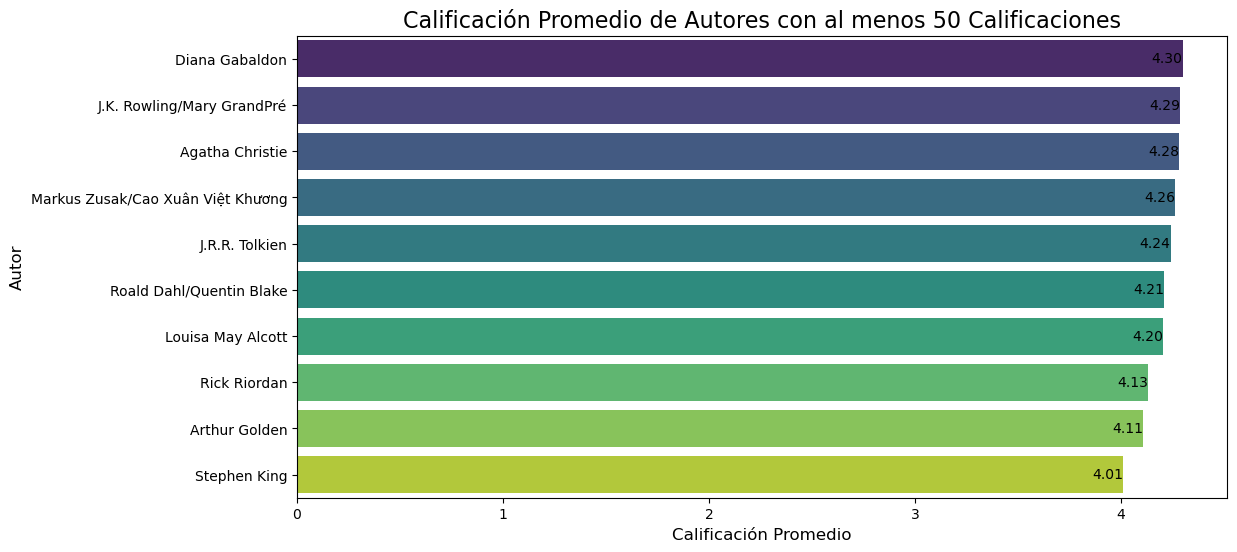

In [10]:
# Autores con calificaciones promedio y número de calificaciones
query_authors_ratings = """
SELECT 
    authors.author, 
    AVG(ratings.rating) AS avg_rating, 
    COUNT(ratings.rating) AS num_ratings
FROM books
JOIN authors ON books.author_id = authors.author_id
JOIN ratings ON books.book_id = ratings.book_id
GROUP BY authors.author
HAVING COUNT(ratings.rating) >= 50
ORDER BY avg_rating DESC
LIMIT 10;
"""
authors_ratings = pd.read_sql(query_authors_ratings, engine)
print("Autores con más alta calificación promedio (con al menos 50 calificaciones):")
display(authors_ratings)

# Gráfico de barras
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='avg_rating', y='author', data=authors_ratings, palette='viridis')
bar_plot.set_title('Calificación Promedio de Autores con al menos 50 Calificaciones', fontsize=16)
bar_plot.set_xlabel('Calificación Promedio', fontsize=12)
bar_plot.set_ylabel('Autor', fontsize=12)

# Mostrar calificaciones promedio en las barras
for index, value in enumerate(authors_ratings['avg_rating']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="right", va="center")

plt.show()

   - Diana Gabaldon tiene la calificación promedio más alta (4.3) entre los autores que tienen al menos 50 calificaciones, destacándose como una autora favorita entre los lectores.

## Número promedio de reseñas de texto entre los usuarios que calificaron más de 50 libros

In [6]:
# Número promedio de reseñas de texto entre los usuarios que calificaron más de 50 libros
query_avg_text_reviews = """
SELECT 
    AVG(text_reviews.num_reviews) AS avg_text_reviews
FROM (
    SELECT 
        reviews.username, 
        COUNT(reviews.text) AS num_reviews
    FROM reviews
    JOIN ratings ON reviews.book_id = ratings.book_id AND reviews.username = ratings.username
    GROUP BY reviews.username
    HAVING COUNT(ratings.rating) > 50
) AS text_reviews;
"""
avg_text_reviews = pd.read_sql(query_avg_text_reviews, engine)
print("Número promedio de reseñas de texto entre los usuarios que calificaron más de 50 libros:")
print(avg_text_reviews)


Número promedio de reseñas de texto entre los usuarios que calificaron más de 50 libros:
  avg_text_reviews
0             None


   - No se encontraron usuarios que hayan calificado más de 50 libros y dejado reseñas de texto, sugiriendo que este comportamiento no es común en la base de datos.

## Conclusión General

El análisis de los datos del servicio de libros reveló información valiosa sobre la publicación y valoración de libros. Identificamos tendencias en la publicación de libros modernos, la popularidad de ciertos títulos y editoriales, y las calificaciones de autores destacados. Estos hallazgos proporcionan una base sólida para desarrollar una propuesta de valor para un nuevo producto en el mercado de aplicaciones para amantes de los libros.

### Recomendaciones

1. **Optimizar Estrategias de Marketing**:
   - Considerar estrategias de marketing que destaquen libros modernos y populares como "Twilight" y "The Hobbit" para atraer más usuarios y mantener el interés de los actuales.

2. **Fomentar la Publicación de Reseñas de Texto**:
   - Implementar incentivos para que los usuarios que califican muchos libros también dejen reseñas de texto, proporcionando así más información útil para otros usuarios.

3. **Colaboración con Penguin Books**:
   - Establecer colaboraciones o promociones con Penguin Books, dado que es una editorial prominente en la base de datos, para ampliar la oferta de libros populares y de alta calidad.
   
### Recomendación General

Recomendamos enfocar esfuerzos en promover libros modernos y populares, como los identificados en el análisis, y establecer colaboraciones estratégicas con editoriales prominentes como Penguin Books. Además, incentivar a los usuarios a dejar reseñas de texto podría mejorar la calidad de la información disponible para otros usuarios, potenciando la experiencia global en la plataforma.